## **II - Data Preprocessing**
In some datasets, there are missing values, outliers, and categorical variables. These issues can affect the performance of the model. Therefore, it is important to preprocess the data before training the model. In this notebook, we will preprocess the data by filling the missing values, encoding the categorical variables, and scaling the features.


### **II.1 Importing the Libraries and Loading the Data**

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

awards_players = pd.read_csv('../data/basketballPlayoffs/awards_players.csv')
coaches = pd.read_csv('../data/basketballPlayoffs/coaches.csv')
players = pd.read_csv('../data/basketballPlayoffs/players.csv')
players_teams = pd.read_csv('../data/basketballPlayoffs/players_teams.csv')
series_post = pd.read_csv('../data/basketballPlayoffs/series_post.csv')
teams = pd.read_csv('../data/basketballPlayoffs/teams.csv')
teams_post = pd.read_csv('../data/basketballPlayoffs/teams_post.csv')

### **II.2 Maping the Categorical Variables**
Map categorical values (teams, arenas, awards) to numerical codes for model training.

In [405]:
map_teams = {
    'ATL': 0, 'CHA': 1, 'CHI': 2, 'CLE': 3, 'CON': 4, 
    'DET': 5, 'HOU': 6, 'IND': 7, 'LAS': 8, 'MIA': 9, 
    'MIN': 10, 'NYL': 11, 'ORL': 12, 'PHO': 13, 'POR': 14, 
    'SAC': 15, 'SAS': 16, 'SEA': 17, 'UTA': 18, 'WAS': 19
}

map_teams_name = {
    'Atlanta Dream': 0, 'Charlotte Sting': 1, 'Chicago Sky': 2, 
    'Cleveland Rockers': 3, 'Connecticut Sun': 4, 'Detroit Shock': 5, 
    'Houston Comets': 6, 'Indiana Fever': 7, 'Los Angeles Sparks': 8, 
    'Miami Sol': 9, 'Minnesota Lynx': 10, 'New York Liberty': 11, 
    'Orlando Miracle': 12, 'Phoenix Mercury': 13, 'Portland Fire': 14, 
    'Sacramento Monarchs': 15, 'San Antonio Silver Stars': 16, 
    'Seattle Storm': 17, 'Utah Starzz': 18, 'Washington Mystics': 19
}

map_arenas = {
    'Philips Arena': 0, 'Charlotte Coliseum': 1, 'Time Warner Cable Arena': 2, 
    'UIC Pavilion': 3, 'Quicken Loans Arena': 4, 'Mohegan Sun Arena': 5, 
    'The Palace of Auburn Hills': 6, 'Compaq Center': 7, 'Toyota Center': 8, 
    'Conseco Fieldhouse': 9, 'Staples Center': 10, 'AmericanAirlines Arena': 11, 
    'Target Center': 12, 'Madison Square Garden (IV)': 13, 'Amway Arena': 14, 
    'US Airways Center': 15, 'Rose Garden Arena': 16, 'ARCO Arena (II)': 17, 
    'AT&T Center': 18, 'KeyArena at Seattle Center': 19, 
    'EnergySolutions Arena': 20, 'Verizon Center': 21
}

map_awards = {
    'All-Star Game Most Valuable Player': 0,
    'Coach of the Year': 1,
    'Defensive Player of the Year': 2,
    'Kim Perrot Sportsmanship Award': 3,
    'Kim Perrot Sportsmanship': 3,
    'Most Improved Player': 4,
    'Most Valuable Player': 5,
    'Rookie of the Year': 6,
    'Sixth Woman of the Year': 7,
    'WNBA Finals Most Valuable Player': 8,
    'WNBA All-Decade Team': 9,
    'WNBA All Decade Team Honorable Mention': 10
}

### **II.3 Plot Functions**
Define plot functions to visualize the data.

In [406]:
def plot_missing_values(df, title):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]  
    
    if len(missing_values) > 0:
        plt.figure(figsize=(10, 6))
        missing_values.plot(kind='bar')
        plt.title(f'Missing Values in {title}')
        plt.ylabel('Number of Missing Values')
        plt.xlabel('Columns')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f'No missing values in {title}')

### **II.4 Players Data Preprocessing**

The Players dataset needs further preprocessing, including dealing with missing values, correcting invalid data, and converting player positions into numerical values.

In [407]:
players['pos'] = players['pos'].replace({'G-C': 'C-G', 'F-G': 'G-F'})

positions = players['pos'].unique()
map_positions = {pos: i for i, pos in enumerate(positions)}

players['pos'] = players['pos'].map(map_positions)

We decided to remove players with invalid death dates and unnecessary columns, filter players without birth dates, identify relevant players in the teams table, and drop those with missing birth dates.

In [408]:
players['birthDate'] = pd.to_datetime(players['birthDate'], errors='coerce')

players_cleaned = players[players['deathDate'] == '0000-00-00'].drop(columns=['deathDate','firstseason','lastseason'])

players_cleaned = players_cleaned.drop(columns=['collegeOther'])

players_no_birthdate = players_cleaned[players_cleaned['birthDate'].isnull()]

players_no_birthdate_teams = players_no_birthdate[players_no_birthdate['bioID'].isin(players_teams['playerID'])]

print("\nPlayers with no birthdate that are in the teams_players table:")

print(players_no_birthdate_teams)

indices_to_rem = players_no_birthdate.index

players_cleaned = players_cleaned.drop(indices_to_rem)

print(players_cleaned)


Players with no birthdate that are in the teams_players table:
Empty DataFrame
Columns: [bioID, pos, height, weight, college, birthDate]
Index: []
          bioID  pos  height  weight            college  birthDate
0    abrahta01w    0    74.0     190  George Washington 1975-09-27
1    abrossv01w    1    74.0     169        Connecticut 1980-07-09
2    adairje01w    0    76.0     197  George Washington 1986-12-19
3    adamsda01w    2    73.0     239          Texas A&M 1989-02-19
4    adamsjo01w    0    75.0     180         New Mexico 1981-05-24
..          ...  ...     ...     ...                ...        ...
887   zarafr01w    4    70.0     146                NaN 1976-12-08
888  zellosh01w    4    70.0     155         Pittsburgh 1986-08-28
889  zhengha01w    0    80.0     254                NaN 1967-03-07
891  zirkozu01w    4    69.0     145                NaN 1980-06-06
892   zollsh01w    4    67.0     148           Virginia 1986-07-11

[805 rows x 6 columns]


We check for missing values in the datasets.

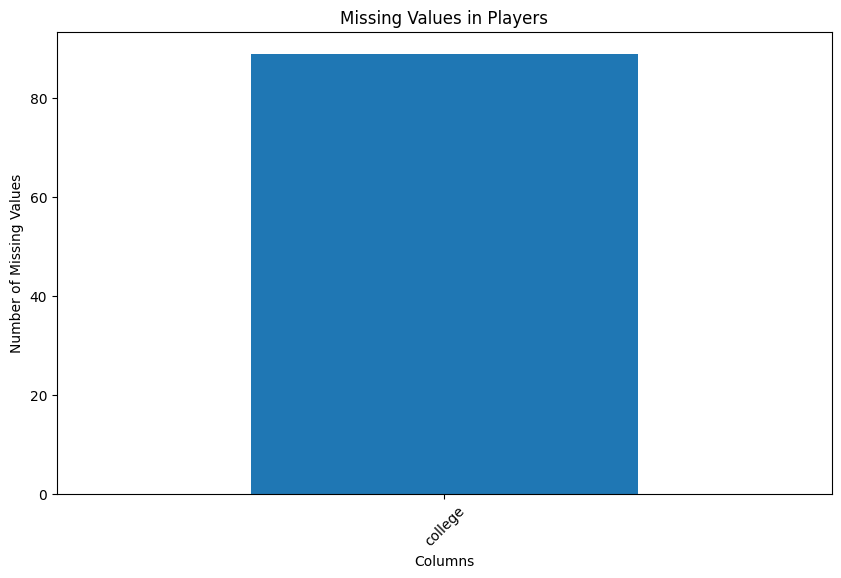

In [409]:
plot_missing_values(players_cleaned, 'Players')

### **II.5 Coaches Data Preprocessing**
In the Coaches dataset, we apply a similar mapping to team IDs.

In [410]:
coaches['tmID'] = coaches['tmID'].map(map_teams)

Then we drop the columns that are not needed for the analysis.

In [411]:
coaches_cleaned = coaches.drop(columns=['lgID'])

And we check for missing values in the datasets.

In [412]:
print("\nMissing Values in Coaches:")
print(coaches_cleaned.isnull().sum())


Missing Values in Coaches:
coachID        0
year           0
tmID           0
stint          0
won            0
lost           0
post_wins      0
post_losses    0
dtype: int64


### **II.6 Teams Data Preprocessing**

In the Teams dataset, we will map some values (like team names and playoff outcomes) to numerical representations.

In [413]:
pd.set_option('future.no_silent_downcasting', True)

# Função para substituir valores
def replace_values(df, column, old_values, new_values):
    return df[column].replace(dict(zip(old_values, new_values)))

teams['firstRound'] = replace_values(teams, 'firstRound', ['L', 'W'], [0, 1])
teams['semis'] = replace_values(teams, 'semis', ['L', 'W'], [0, 1])
teams['finals'] = replace_values(teams, 'finals', ['L', 'W'], [0, 1])
teams['playoff'] = replace_values(teams, 'playoff', ['N', 'Y'], [0, 1])
teams['confID'] = replace_values(teams, 'confID', ['EA', 'WE'], [0, 1])
teams['tmID'] = teams['tmID'].replace(map_teams)
teams['franchID'] = teams['franchID'].replace(map_teams)
teams['name'] = teams['name'].replace(map_teams_name)
teams['arena'] = teams['arena'].replace(map_arenas)

Drop the columns that are not needed for the analysis.

In [414]:
teams_cleaned = teams.drop(columns=['lgID'])

Check for missing values in the datasets.


Missing Values in Teams:
year            0
tmID            0
franchID        0
confID          0
divID         142
rank            0
playoff         0
seeded          0
firstRound     62
semis         104
finals        122
name            0
o_fgm           0
o_fga           0
o_ftm           0
o_fta           0
o_3pm           0
o_3pa           0
o_oreb          0
o_dreb          0
o_reb           0
o_asts          0
o_pf            0
o_stl           0
o_to            0
o_blk           0
o_pts           0
d_fgm           0
d_fga           0
d_ftm           0
d_fta           0
d_3pm           0
d_3pa           0
d_oreb          0
d_dreb          0
d_reb           0
d_asts          0
d_pf            0
d_stl           0
d_to            0
d_blk           0
d_pts           0
tmORB           0
tmDRB           0
tmTRB           0
opptmORB        0
opptmDRB        0
opptmTRB        0
won             0
lost            0
GP              0
homeW           0
homeL           0
awayW           0
aw

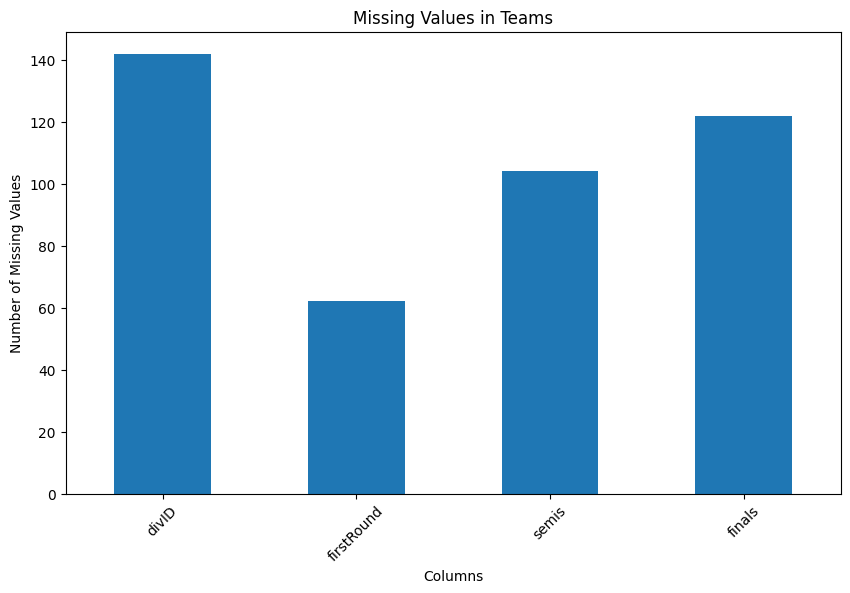

In [415]:
print("\nMissing Values in Teams:")
print(teams_cleaned.isnull().sum())

plot_missing_values(teams_cleaned, 'Teams')

Drop the columns with missing values

In [416]:
teams_cleaned.drop(columns=['franchID','divID'])

#Assuming that the missing values in firstRound, semis and finals represent that the team didn't reach that stage we will replace all the missing values by the number 2
teams_cleaned['firstRound'] = teams_cleaned['firstRound'].fillna(2)
teams_cleaned['semis'] = teams_cleaned['semis'].fillna(2)
teams_cleaned['finals'] = teams_cleaned['finals'].fillna(2)

### **II.7 Players Teams Data Preprocessing**

In the Players Teams dataset, we will map some values (like team names) to numerical representations.

In [417]:
players_teams['tmID'] = players_teams['tmID'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [418]:
players_teams_cleaned = players_teams.drop(columns=['lgID'])

Check for missing values in the datasets.

In [419]:
print("\nMissing Values in Players Teams:")
print(players_teams_cleaned.isnull().sum())


Missing Values in Players Teams:
playerID              0
year                  0
stint                 0
tmID                  0
GP                    0
GS                    0
minutes               0
points                0
oRebounds             0
dRebounds             0
rebounds              0
assists               0
steals                0
blocks                0
turnovers             0
PF                    0
fgAttempted           0
fgMade                0
ftAttempted           0
ftMade                0
threeAttempted        0
threeMade             0
dq                    0
PostGP                0
PostGS                0
PostMinutes           0
PostPoints            0
PostoRebounds         0
PostdRebounds         0
PostRebounds          0
PostAssists           0
PostSteals            0
PostBlocks            0
PostTurnovers         0
PostPF                0
PostfgAttempted       0
PostfgMade            0
PostftAttempted       0
PostftMade            0
PostthreeAttempted    0
Postth

### **II.8 Player Awards Data Preprocessing**

In the Awards Players dataset, we will map some values (like team names) to numerical representations.

In [420]:
awards_players = awards_players.replace(map_awards)

Drop the columns that are not needed for the analysis.

In [421]:
awards_players_cleaned = awards_players.drop(columns=['lgID'])

Check for missing values in the dataset.

In [422]:
print("Missing Values in Awards Players:")
print(awards_players_cleaned.isnull().sum())

Missing Values in Awards Players:
playerID    0
award       0
year        0
dtype: int64


### **II.9 Series Post Data Preprocessing**
In the Series Post dataset, we will map some values (like playoff outcomes) to numerical representations.

In [423]:
series_post['tmIDWinner'] = series_post['tmIDWinner'].map(map_teams)
series_post['tmIDLoser'] = series_post['tmIDLoser'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [424]:
series_post_cleaned = series_post.drop(columns=['lgIDWinner','lgIDLoser'])

Check for missing values in the datasets.

In [425]:
print("\nMissing Values in Series Post:")
print(series_post_cleaned.isnull().sum())


Missing Values in Series Post:
year          0
round         0
series        0
tmIDWinner    0
tmIDLoser     0
W             0
L             0
dtype: int64


### **II.10 Teams Post Data Preprocessing**
In the **Teams Post** dataset, we will map some values (like playoff outcomes) to numerical representations.

In [426]:
teams_post['tmID'] = teams_post['tmID'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [427]:
teams_post_cleaned = teams_post.drop(columns=['lgID'])

Check for missing values in the datasets.

In [428]:
print("\nMissing Values in Teams Post:")
print(teams_post_cleaned.isnull().sum())


Missing Values in Teams Post:
year    0
tmID    0
W       0
L       0
dtype: int64


### **II.11 Creating Output Directory and Exporting Cleaned DataFrames to new CSV files**
After preprocessing, export each cleaned dataset to new CSV files. This saves the refined data, making it easier to load for future analysis and model training.

In [429]:
os.makedirs('../data/basketballPlayoffs_cleaned', exist_ok=True)

awards_players_cleaned.to_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv', index=False)
coaches_cleaned.to_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv', index=False)
players_teams_cleaned.to_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv', index=False)
players_cleaned.to_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv', index=False)
series_post_cleaned.to_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv', index=False)
teams_post_cleaned.to_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv', index=False)
teams_cleaned.to_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv', index=False)

### **II.12 Dealing with players weight missing data**
Lets import the new cleaned dataset so we can deal with the missing data

In [430]:
players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv')

This code calculates the weight of players using an ideal Body Mass Index (BMI) of 22 and rounding the resulting weights to integers.

In [431]:
ideal_bmi = 22

players_cleaned['height_m'] = players_cleaned['height'] * 0.0254

players_cleaned.loc[players_cleaned['weight'] == 0, 'weight'] = (ideal_bmi * (players_cleaned['height_m'] ** 2) / 0.453592).round(0)

players_cleaned['weight'] = players_cleaned['weight'].astype(int)

players_cleaned.drop(columns=['height_m'], inplace=True)

Export updated dataframe with weights

In [432]:
players_cleaned.to_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv', index=False)

### **II.13 Outliers**


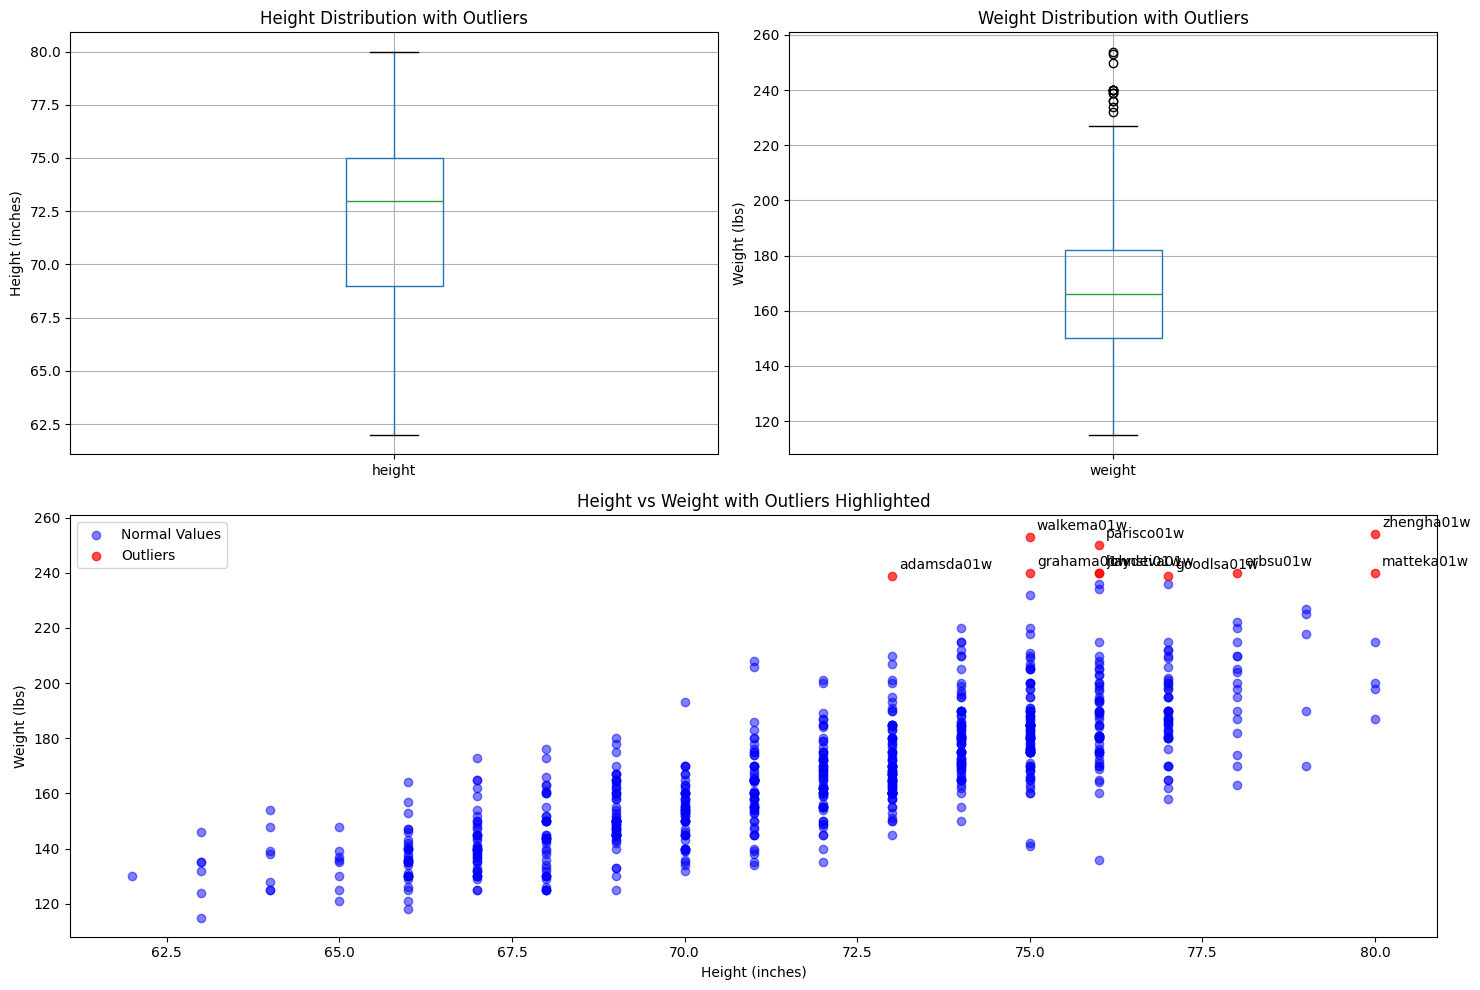


Outlier Summary:

Height Outliers (Z-score > 3):
Empty DataFrame
Columns: [bioID, height, weight]
Index: []

Weight Outliers (Z-score > 3):
          bioID  height  weight
802  zhengha01w    80.0     254
738  walkema01w    75.0     253
534  parisco01w    76.0     250
208    erbsu01w    78.0     240
267  grahama01w    75.0     240
297  haydeva01w    76.0     240
363  johnsti01w    76.0     240
444  matteka01w    80.0     240
3    adamsda01w    73.0     239
262  goodlsa01w    77.0     239

Basic Statistics:

Height (inches):
count    805.000000
mean      72.045963
std        3.535411
min       62.000000
25%       69.000000
50%       73.000000
75%       75.000000
max       80.000000
Name: height, dtype: float64

Weight (lbs):
count    805.000000
mean     167.722981
std       23.602935
min      115.000000
25%      150.000000
50%      166.000000
75%      182.000000
max      254.000000
Name: weight, dtype: float64


In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Read the data
df = pd.read_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv')

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Box plots for height and weight
plt.subplot(2, 2, 1)
df.boxplot(column='height', whis=1.5)
plt.title('Height Distribution with Outliers')
plt.ylabel('Height (inches)')

plt.subplot(2, 2, 2)
df.boxplot(column='weight', whis=1.5)
plt.title('Weight Distribution with Outliers')
plt.ylabel('Weight (lbs)')

# 2. Scatter plot of height vs weight with outlier highlighting
plt.subplot(2, 2, (3, 4))

# Calculate Z-scores for both height and weight
z_height = np.abs(stats.zscore(df['height']))
z_weight = np.abs(stats.zscore(df['weight']))

# Define outliers (Z-score > 3)
outliers = (z_height > 3) | (z_weight > 3)

# Create scatter plot
plt.scatter(df.loc[~outliers, 'height'], 
           df.loc[~outliers, 'weight'], 
           alpha=0.5, 
           c='blue',
           label='Normal Values')
plt.scatter(df.loc[outliers, 'height'], 
           df.loc[outliers, 'weight'], 
           color='red', 
           alpha=0.7, 
           label='Outliers')

plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Height vs Weight with Outliers Highlighted')
plt.legend()

# Add player labels for outliers
for idx in df[outliers].index:
    plt.annotate(df.loc[idx, 'bioID'], 
                (df.loc[idx, 'height'], df.loc[idx, 'weight']),
                xytext=(5, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Print summary statistics of outliers
print("\nOutlier Summary:")
print("\nHeight Outliers (Z-score > 3):")
height_outliers = df[z_height > 3][['bioID', 'height', 'weight']].sort_values(by='height', ascending=False)
print(height_outliers.to_string())
print("\nWeight Outliers (Z-score > 3):")
weight_outliers = df[z_weight > 3][['bioID', 'height', 'weight']].sort_values(by='weight', ascending=False)
print(weight_outliers.to_string())

# Print basic statistics
print("\nBasic Statistics:")
print("\nHeight (inches):")
print(df['height'].describe())
print("\nWeight (lbs):")
print(df['weight'].describe())


Analyzing dataset: Coaches Overall
Numeric columns: ['OVERALL_ALL_TIME']


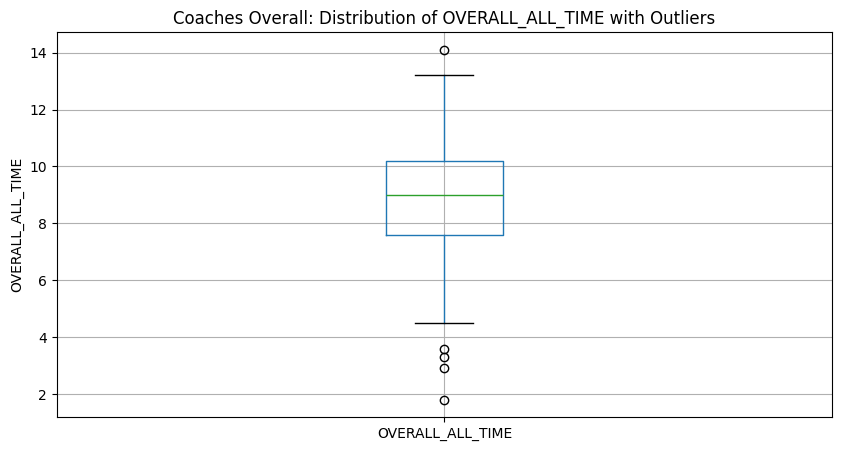


Outlier Summary for OVERALL_ALL_TIME (Z-score > 3):
Empty DataFrame
Columns: [coachID, OVERALL_ALL_TIME]
Index: []

Basic Statistics for OVERALL_ALL_TIME:
count    57.000000
mean      8.747368
std       2.600900
min       1.800000
25%       7.600000
50%       9.000000
75%      10.200000
max      14.100000
Name: OVERALL_ALL_TIME, dtype: float64

Analyzing dataset: Players Overall
Numeric columns: ['OVERALL_ALL_TIME']


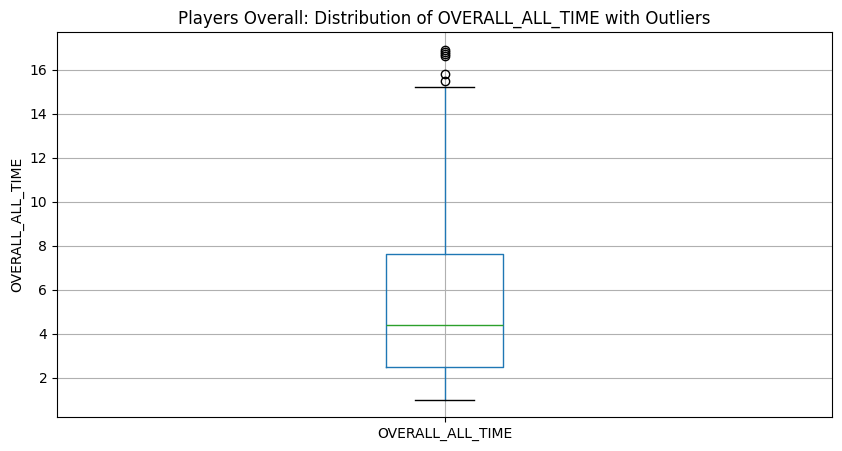


Outlier Summary for OVERALL_ALL_TIME (Z-score > 3):
       playerID  OVERALL_ALL_TIME
86   catchta01w              16.7
228  jacksla01w              16.8
275  leslili01w              16.9
368  parkeca01w              16.6

Basic Statistics for OVERALL_ALL_TIME:
count    555.000000
mean       5.465405
std        3.693876
min        1.000000
25%        2.500000
50%        4.400000
75%        7.600000
max       16.900000
Name: OVERALL_ALL_TIME, dtype: float64


In [434]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# List of datasets and their paths
datasets = {
    'Coaches Overall': '../data/basketballPlayoffs_cleaned/coaches_overall_all_time.csv',
    'Players Overall': '../data/basketballPlayoffs_cleaned/players_overall_all_time.csv'
}

# Process each dataset
for dataset_name, file_path in datasets.items():
    print(f"\nAnalyzing dataset: {dataset_name}")
    
    # Read the data
    df = pd.read_csv(file_path)
    
    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(f"Numeric columns: {list(numeric_cols)}")
    
    # Proceed if there is exactly one numeric column
    if len(numeric_cols) == 1:
        numeric_col = numeric_cols[0]
        
        # Calculate Z-scores for the column
        z_scores = np.abs(stats.zscore(df[numeric_col]))
        
        # Define outliers (Z-score > 3)
        outliers = z_scores > 3
        
        # Visualize outliers with a boxplot
        plt.figure(figsize=(10, 5))
        df.boxplot(column=numeric_col, whis=1.5)
        plt.title(f'{dataset_name}: Distribution of {numeric_col} with Outliers')
        plt.ylabel(numeric_col)
        plt.show()

        # Summary of outliers
        print(f"\nOutlier Summary for {numeric_col} (Z-score > 3):")
        outlier_data = df[outliers]
        print(outlier_data)

        # Basic statistics
        print(f"\nBasic Statistics for {numeric_col}:")
        print(df[numeric_col].describe())
    else:
        print("No numeric column or more than one numeric column found.")
